In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("train.csv")


In [4]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:

df['Age'] = df['Age'].fillna(df['Age'].median())


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)


In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


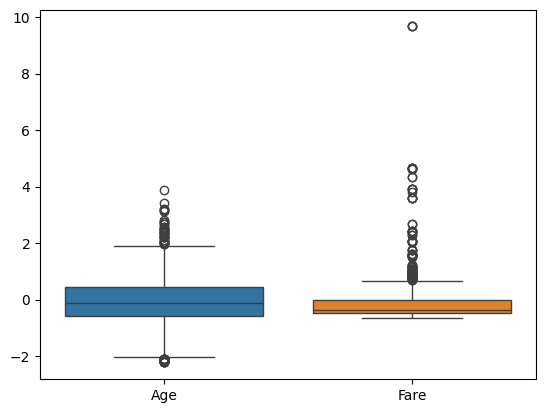

In [12]:
# Boxplot to check outliers
sns.boxplot(data=df[['Age', 'Fare']])
plt.show()

# Remove outliers using IQR
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]
